In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import sqlite3 as sql
import re
from datetime import datetime
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline


In [2]:
#!pip install openpyxl


In [3]:
police_calls=pd.read_excel("../drive-download-20220404T141044Z-001/Mental_Calls_by_Precinct_Plain_Text_Incident_Types_070121_022822.xlsx")

In [4]:
police_calls

,Precinct,Date,Created,Address,Incident Type,Priority
0,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2
2,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2
3,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2
4,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...
48014,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2
48015,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
48016,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
48017,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2


In [5]:
police_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48019 entries, 0 to 48018
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Precinct       48019 non-null  object
 1   Date           47927 non-null  object
 2   Created        47927 non-null  object
 3   Address        47927 non-null  object
 4   Incident Type  47927 non-null  object
 5   Priority       47927 non-null  object
dtypes: object(6)
memory usage: 2.2+ MB


In [6]:
police_calls=police_calls.dropna()

In [7]:
police_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47927 entries, 0 to 48018
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Precinct       47927 non-null  object
 1   Date           47927 non-null  object
 2   Created        47927 non-null  object
 3   Address        47927 non-null  object
 4   Incident Type  47927 non-null  object
 5   Priority       47927 non-null  object
dtypes: object(6)
memory usage: 2.6+ MB


In [8]:
#there is an extra row 42490 because when I joined two datasets in excel the header from march dataset got added.
police_calls.loc[police_calls.Precinct=='Precinct']

,Precinct,Date,Created,Address,Incident Type,Priority
42490,Precinct,Date,Created,Address,Incident Type,Priority


In [9]:
#using the index number I can drop the row.

police_calls=police_calls.drop(index=42490)

In [10]:
police_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47926 entries, 0 to 48018
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Precinct       47926 non-null  object
 1   Date           47926 non-null  object
 2   Created        47926 non-null  object
 3   Address        47926 non-null  object
 4   Incident Type  47926 non-null  object
 5   Priority       47926 non-null  object
dtypes: object(6)
memory usage: 2.6+ MB


In [11]:
police_calls['Precinct'].value_counts()

H       7957
S       7953
C       6870
MT      5973
N       5515
M       4867
E       4408
W       4258
CW       118
PCW        4
CMD1       2
CMD2       1
Name: Precinct, dtype: int64

In [13]:
conn = sql.connect("../census.sqlite")
cur = conn.cursor()

In [14]:
# Execute tells the cursor to run the query provided


cur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")

# fetchall() allows us to see everything returned by our query, which we store in our 'available_tables' variable
available_tables = (cur.fetchall())

In [15]:
print(available_tables)

[('B01001',), ('B03002',), ('B11001',), ('B11002',), ('B15002',), ('B19001',), ('B19013',), ('B19301',), ('B25024',), ('B25075',), ('S1701',)]


In [16]:
# Let's check to see what our data looks like by selecting the first 5 rows

cur.execute("SELECT * FROM B01001 LIMIT 5;")

B01001 = (cur.fetchall())

In [17]:
type(B01001)

list

In [18]:
B01001

[(0,
  '1400000US47037010103',
  'Census Tract 101.03, Davidson County, Tennessee',
  10103,
  37,
  47,
  'B01001_001E',
  2533,
  'Estimate!!Total:'),
 (1,
  '1400000US47037010104',
  'Census Tract 101.04, Davidson County, Tennessee',
  10104,
  37,
  47,
  'B01001_001E',
  2955,
  'Estimate!!Total:'),
 (2,
  '1400000US47037010105',
  'Census Tract 101.05, Davidson County, Tennessee',
  10105,
  37,
  47,
  'B01001_001E',
  4435,
  'Estimate!!Total:'),
 (3,
  '1400000US47037010106',
  'Census Tract 101.06, Davidson County, Tennessee',
  10106,
  37,
  47,
  'B01001_001E',
  3397,
  'Estimate!!Total:'),
 (4,
  '1400000US47037010201',
  'Census Tract 102.01, Davidson County, Tennessee',
  10201,
  37,
  47,
  'B01001_001E',
  4157,
  'Estimate!!Total:')]

In [19]:
# Using the same query as before to select the first 5 rows and saving it to a new df.
pop_by_age_sex_df = pd.read_sql("SELECT * FROM B01001;", conn)

In [20]:
type(pop_by_age_sex_df)

pandas.core.frame.DataFrame

In [21]:
pop_by_age_sex_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B01001_001E,2533,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B01001_001E,2955,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B01001_001E,4435,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B01001_001E,3397,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B01001_001E,4157,Estimate!!Total:


In [22]:
#Now we will use each one of the tables and convert then in datafram and read them in sql, also changed their names.
pop_race_eth_df=pd.read_sql("SELECT* FROM B03002;", conn)

In [23]:
type(pop_race_eth_df)

pandas.core.frame.DataFrame

In [24]:
pop_race_eth_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B03002_001E,2533,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B03002_001E,2955,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B03002_001E,4435,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B03002_001E,3397,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B03002_001E,4157,Estimate!!Total:


In [25]:
hshld_tp_df=pd.read_sql("SELECT* FROM B11001;", conn)

In [26]:
hshld_tp_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B11001_001E,990,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B11001_001E,1221,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B11001_001E,1860,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B11001_001E,1152,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B11001_001E,1731,Estimate!!Total:


In [27]:
pop_hshld_tp_df=pd.read_sql("SELECT* FROM B11002;", conn)

In [28]:
pop_hshld_tp_df

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B11002_001E,2533,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B11002_001E,2955,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B11002_001E,4430,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B11002_001E,3260,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B11002_001E,4157,Estimate!!Total:
...,...,...,...,...,...,...,...,...,...
1927,1927,1400000US47037019400,"Census Tract 194, Davidson County, Tennessee",19400,37,47,B11002_012E,2936,Estimate!!Total:!!In nonfamily households
1928,1928,1400000US47037019500,"Census Tract 195, Davidson County, Tennessee",19500,37,47,B11002_012E,5088,Estimate!!Total:!!In nonfamily households
1929,1929,1400000US47037019600,"Census Tract 196, Davidson County, Tennessee",19600,37,47,B11002_012E,1196,Estimate!!Total:!!In nonfamily households
1930,1930,1400000US47037980100,"Census Tract 9801, Davidson County, Tennessee",980100,37,47,B11002_012E,0,Estimate!!Total:!!In nonfamily households


In [29]:
gender_by_ed_for_pop_over_25_df=pd.read_sql("SELECT* FROM B15002;", conn)

In [30]:
gender_by_ed_for_pop_over_25_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B15002_001E,1872,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B15002_001E,2349,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B15002_001E,3621,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B15002_001E,2301,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B15002_001E,3163,Estimate!!Total:


In [31]:
hshld_inc_df=pd.read_sql("SELECT* FROM B19001;", conn)

In [32]:
hshld_inc_df

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B19001_001E,990,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B19001_001E,1221,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B19001_001E,1860,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B19001_001E,1152,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B19001_001E,1731,Estimate!!Total:
...,...,...,...,...,...,...,...,...,...
2732,2732,1400000US47037019400,"Census Tract 194, Davidson County, Tennessee",19400,37,47,B19001_017E,311,"Estimate!!Total:!!$200,000 or more"
2733,2733,1400000US47037019500,"Census Tract 195, Davidson County, Tennessee",19500,37,47,B19001_017E,654,"Estimate!!Total:!!$200,000 or more"
2734,2734,1400000US47037019600,"Census Tract 196, Davidson County, Tennessee",19600,37,47,B19001_017E,99,"Estimate!!Total:!!$200,000 or more"
2735,2735,1400000US47037980100,"Census Tract 9801, Davidson County, Tennessee",980100,37,47,B19001_017E,0,"Estimate!!Total:!!$200,000 or more"


In [33]:
median_hshld_inc_df=pd.read_sql("SELECT* FROM B19013;", conn)

In [34]:
median_hshld_inc_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B19013_001E,70341,Estimate!!Median household income in the past ...
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B19013_001E,64844,Estimate!!Median household income in the past ...
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B19013_001E,64688,Estimate!!Median household income in the past ...
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B19013_001E,63864,Estimate!!Median household income in the past ...
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B19013_001E,62829,Estimate!!Median household income in the past ...


In [35]:
inc_per_cap_df=pd.read_sql("SELECT* FROM B19301;", conn)

In [36]:
inc_per_cap_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B19301_001E,33867,Estimate!!Per capita income in the past 12 mon...
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B19301_001E,38506,Estimate!!Per capita income in the past 12 mon...
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B19301_001E,35122,Estimate!!Per capita income in the past 12 mon...
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B19301_001E,30843,Estimate!!Per capita income in the past 12 mon...
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B19301_001E,34567,Estimate!!Per capita income in the past 12 mon...


In [37]:
str_typ_df=pd.read_sql("SELECT* FROM B25024;", conn)

In [38]:
str_typ_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B25024_001E,1022,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B25024_001E,1382,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B25024_001E,1958,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B25024_001E,1186,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B25024_001E,1826,Estimate!!Total:


In [39]:
ownr_occ_val_df=pd.read_sql("SELECT* FROM B25075;", conn)

In [40]:
ownr_occ_val_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B25075_001E,873,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B25075_001E,975,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B25075_001E,1626,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B25075_001E,885,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B25075_001E,1356,Estimate!!Total:


In [41]:
pov_status_df=pd.read_sql("SELECT* FROM S1701;", conn)

In [42]:
pov_status_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037015631,"Census Tract 156.31, Davidson County, Tennessee",15631,37,47,S1701_C01_001E,12144.0,Estimate!!Total!!Population for whom poverty s...
1,1,1400000US47037015804,"Census Tract 158.04, Davidson County, Tennessee",15804,37,47,S1701_C01_001E,4093.0,Estimate!!Total!!Population for whom poverty s...
2,2,1400000US47037017701,"Census Tract 177.01, Davidson County, Tennessee",17701,37,47,S1701_C01_001E,2466.0,Estimate!!Total!!Population for whom poverty s...
3,3,1400000US47037017702,"Census Tract 177.02, Davidson County, Tennessee",17702,37,47,S1701_C01_001E,3511.0,Estimate!!Total!!Population for whom poverty s...
4,4,1400000US47037018301,"Census Tract 183.01, Davidson County, Tennessee",18301,37,47,S1701_C01_001E,8222.0,Estimate!!Total!!Population for whom poverty s...


In [43]:
# I was trying to find how many mental illness type of incident calls did precinct N got by running a sql query
# but it didnt work because police_calls data is from excel file, sql queries in python will only work if I am trying it 
# using sqlite.
query = '''
SELECT *
FROM police_calls
WHERE Precinct = N AND Incident Type = Mental Illness;
'''

In [44]:
police_calls['Precinct'].describe()

count     47926
unique       12
top           H
freq       7957
Name: Precinct, dtype: object

In [45]:
#using value counts I can see the sum of each value in that column
police_calls['Incident Type'].value_counts()

DISORDERLY SUBJECT      15568
ASSIST EMS              10043
WELFARE CHECK            9545
TRESPASSER               4023
SUSPICIOUS PERSON        2797
DOMESTIC DISTURBANCE     2661
SUICIDAL PERSON          1725
MENTAL CONDITION         1266
INTOXICATED PERSON        298
Name: Incident Type, dtype: int64

In [46]:
police_calls

,Precinct,Date,Created,Address,Incident Type,Priority
0,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2
2,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2
3,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2
4,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...
48014,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2
48015,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
48016,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
48017,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2


In [47]:
#making a new dataframe and saving each precinct with incident type individually
# IN THIS LINE OF CODE- locating precinct S and Incident Type - MENTAL CONDITION in a new dataframe ps(precinct S)
ps=police_calls.loc[(police_calls['Precinct']=='S') & (police_calls['Incident Type']=='MENTAL CONDITION')]

In [48]:
ps

,Precinct,Date,Created,Address,Incident Type,Priority
4043,S,07-01-2021,11:44:57,5221 HARDING PL,MENTAL CONDITION,2M
4044,S,07-01-2021,11:48:03,5221 HARDING PL,MENTAL CONDITION,2M
4049,S,07-01-2021,14:02:23,84 LESTER AVE,MENTAL CONDITION,2
4072,S,07-02-2021,10:23:07,3104 KINWOOD DR,MENTAL CONDITION,3
4097,S,07-03-2021,11:29:10,985 MURFREESBORO PIKE,MENTAL CONDITION,2M
...,...,...,...,...,...,...
47422,S,03-26-2022,22:20:16,3705 WINDSHORE WAY,MENTAL CONDITION,2M
47433,S,03-27-2022,09:36:34,1097 RURAL HILL RD,MENTAL CONDITION,2M
47464,S,03-28-2022,09:46:31,BRILEY PKWY N / I24 E,MENTAL CONDITION,2M
47511,S,03-30-2022,08:19:58,2421 MURFREESBORO PIKE,MENTAL CONDITION,2M


In [49]:
pc=police_calls.loc[(police_calls['Precinct']== 'C') & (police_calls['Incident Type']=='MENTAL CONDITION')]

In [50]:
pc

,Precinct,Date,Created,Address,Incident Type,Priority
9,C,07-01-2021,09:21:46,THE ARCADE,MENTAL CONDITION,3
12,C,07-01-2021,11:14:27,705 DREXEL ST,MENTAL CONDITION,2
38,C,07-02-2021,06:25:35,639 LAFAYETTE ST,MENTAL CONDITION,2
51,C,07-02-2021,15:59:39,615 CHURCH ST,MENTAL CONDITION,2M
121,C,07-04-2021,22:38:33,4TH AVE N / DR MARTIN L KING JR BLVD,MENTAL CONDITION,2M
...,...,...,...,...,...,...
42918,C,03-18-2022,18:54:37,639 LAFAYETTE ST,MENTAL CONDITION,2M
43065,C,03-24-2022,21:14:56,425 REP JOHN LEWIS WAY S,MENTAL CONDITION,2
43150,C,03-28-2022,06:21:31,639 LAFAYETTE ST,MENTAL CONDITION,2
43190,C,03-29-2022,21:39:11,709 REP JOHN LEWIS WAY S,MENTAL CONDITION,3


In [51]:
#Using the .loc method, removing the following precinct CMD1,CMD2,CW,PSW.(THIS METHOD KEEPS ALL THE FOLLOWING PRECINCT AND 
#ANYTHING THAT IS NOT MENTIONED IS NOT DISPLAYED)(PRECINCT N AND H ALREADY HAVE THE PILOT PROGRAM RUNNING SO I REMOVED IT)
police_calls_filtered_without_NH=police_calls.loc[(police_calls['Precinct'] == 'C') 
                 | (police_calls['Precinct']== 'S') | (police_calls['Precinct']== 'MT') 
                 | (police_calls['Precinct']== 'M') | (police_calls['Precinct']== 'E') 
                 | (police_calls['Precinct']== 'W')]  
                                                      

In [52]:
police_calls_filtered_without_NH

,Precinct,Date,Created,Address,Incident Type,Priority
0,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2
2,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2
3,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2
4,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...
48014,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2
48015,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
48016,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
48017,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2


# this is another way of eliminating precincts..
police_calls_filtered=police_calls_filtered.loc[(police_calls_filtered.Precinct !='CW')&
                                               (police_calls_filtered.Precinct !='PCW')&
                                                (police_calls_filtered.Precinct !='CMD1')&
                                                (police_calls_filtered.Precinct !='CMD2')]

In [53]:
#Using the .loc method, removing the following precinct CMD1,CMD2,CW,PSW.(THIS METHOD KEEPS ALL THE FOLLOWING PRECINCT AND 
#ANYTHING THAT IS NOT MENTIONED IS NOT DISPLAYED)(PRECINCT N AND H ALREADY HAVE THE PILOT PROGRAM RUNNING BUT I STILL ADDED IT)
police_calls_filtered=police_calls.loc[(police_calls['Precinct'] == 'C') 
                 | (police_calls['Precinct']== 'S') | (police_calls['Precinct']== 'MT') 
                 | (police_calls['Precinct']== 'M') | (police_calls['Precinct']== 'E') 
                 | (police_calls['Precinct']== 'W') | (police_calls['Precinct']== 'N')
                 | (police_calls['Precinct']== 'H')]  
                                                      

In [54]:
police_calls_filtered

,Precinct,Date,Created,Address,Incident Type,Priority
0,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2
2,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2
3,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2
4,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...
48014,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2
48015,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
48016,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
48017,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2


In [55]:
#CREATED A CROSSTAB WHICH ALLOWS US TO SEE #. IT ALIGNED INCIDENT TYPE AS ROWS AND PRECINCT AND COLUMNS
# EG- FOR EACH ASSIST EMS FOR PRECINCT C THERE WERE 1510 CALLS.

precinct_itype_crstb=pd.crosstab(police_calls_filtered['Precinct'], police_calls_filtered['Incident Type'])

In [56]:
precinct_itype_crstb

Incident Type,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK
Precinct,,,,,,,,,
C,1510,2734,99,73,171,349,171,1023,740
E,887,1457,324,29,110,131,290,291,889
H,1569,2488,528,42,204,284,534,557,1751
M,1119,1368,366,15,116,184,295,288,1116
MT,1250,1938,259,53,141,179,417,557,1179
N,1136,1765,347,14,218,218,290,432,1095
S,1650,2548,559,44,190,237,417,553,1755
W,903,1218,179,28,113,141,370,310,996


<AxesSubplot:>

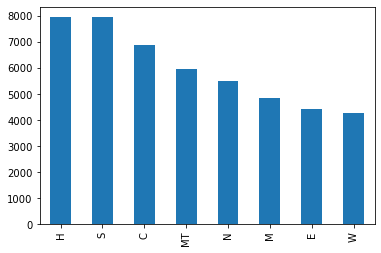

In [57]:
#bar graph showing each precinct on the x axis and calls on they Y axis

police_calls_filtered.Precinct.value_counts().plot(kind='bar')

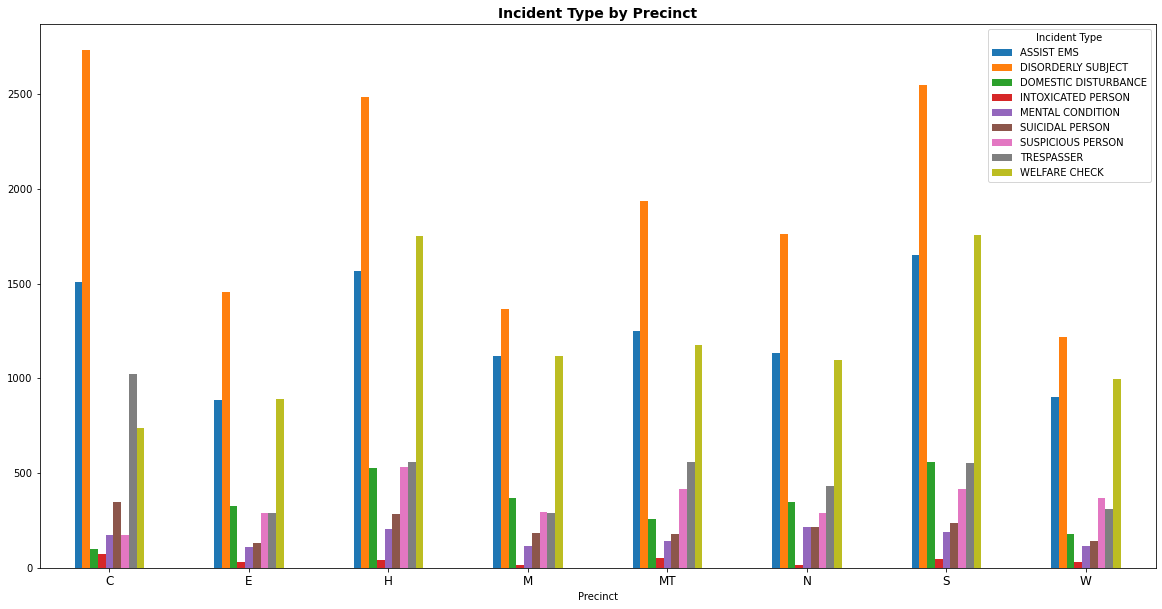

In [58]:
pd.crosstab(police_calls_filtered['Precinct'], police_calls_filtered['Incident Type']).plot(kind = 'bar',
                                                                          figsize = (20, 10))
plt.xticks(rotation = 0,                                               
           fontsize = 12)                   
plt.title('Incident Type by Precinct',                             
         fontsize = 14,
         fontweight = 'bold');

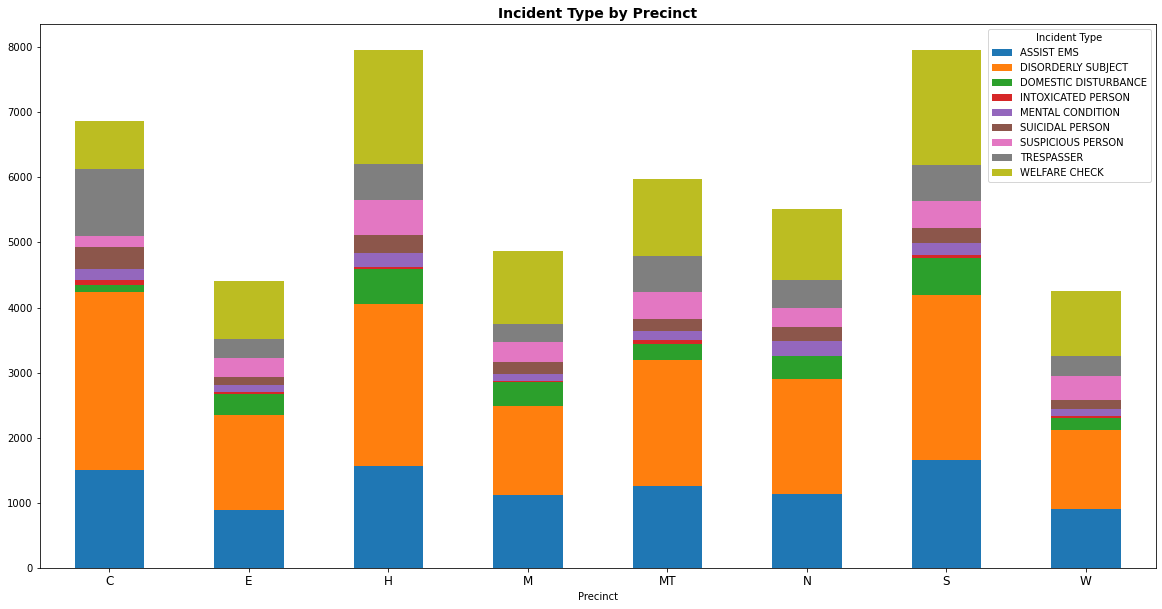

In [59]:
# this is a stacked bar graph representing the same thing as the graph above

pd.crosstab(police_calls_filtered['Precinct'], police_calls_filtered['Incident Type']).plot(kind = 'bar',
                                                                    stacked = True,
                                                                     figsize = (20, 10))
plt.xticks(rotation = 0,                                               
           fontsize = 12)                   
plt.title('Incident Type by Precinct',                             
         fontsize = 14,
         fontweight = 'bold');

In [60]:
pop_by_age_sex_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B01001_001E,2533,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B01001_001E,2955,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B01001_001E,4435,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B01001_001E,3397,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B01001_001E,4157,Estimate!!Total:


In [61]:
geocodes=gpd.read_file("../tl_2021_47_tract/tl_2021_47_tract.shp")

In [62]:
#this shows all the counties because COUNTYFP # SHOW ALL THE COUNTIES IN TN.
geocodes 

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,119,010401,47119010401,104.01,Census Tract 104.01,G5020,S,8617446,57879,+35.6423442,-087.0047157,"POLYGON ((-87.03362 35.62286, -87.03355 35.622..."
1,47,119,010402,47119010402,104.02,Census Tract 104.02,G5020,S,27763309,326739,+35.6669109,-087.0487665,"POLYGON ((-87.08008 35.66597, -87.08004 35.666..."
2,47,119,011004,47119011004,110.04,Census Tract 110.04,G5020,S,48489733,100977,+35.5297960,-087.1554372,"POLYGON ((-87.22260 35.52095, -87.22259 35.521..."
3,47,119,010204,47119010204,102.04,Census Tract 102.04,G5020,S,16427796,12744,+35.7305915,-086.9073094,"POLYGON ((-86.92477 35.74059, -86.92469 35.740..."
4,47,119,010203,47119010203,102.03,Census Tract 102.03,G5020,S,26751910,161446,+35.7056292,-086.9416153,"POLYGON ((-86.97931 35.70266, -86.97873 35.703..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,47,165,021107,47165021107,211.07,Census Tract 211.07,G5020,S,4283183,1241744,+36.2818729,-086.6100090,"POLYGON ((-86.62346 36.28037, -86.62344 36.280..."
1697,47,165,021008,47165021008,210.08,Census Tract 210.08,G5020,S,17902923,152747,+36.3481125,-086.5647003,"POLYGON ((-86.59766 36.32376, -86.59704 36.324..."
1698,47,165,020405,47165020405,204.05,Census Tract 204.05,G5020,S,15746449,0,+36.4962666,-086.6275944,"POLYGON ((-86.66241 36.46172, -86.66223 36.461..."
1699,47,165,020502,47165020502,205.02,Census Tract 205.02,G5020,S,37283412,14427,+36.4082849,-086.5302752,"POLYGON ((-86.57121 36.41268, -86.57114 36.413..."


In [63]:
#we are only looking into countyfp037 because its the davidson county
geocodes.loc[geocodes.COUNTYFP=='037']

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
37,47,037,013202,47037013202,132.02,Census Tract 132.02,G5020,S,2721406,12651,+36.1602781,-086.8703605,"POLYGON ((-86.88928 36.16390, -86.88908 36.163..."
38,47,037,013201,47037013201,132.01,Census Tract 132.01,G5020,S,1909944,254000,+36.1496854,-086.8826046,"POLYGON ((-86.89208 36.14293, -86.89191 36.143..."
39,47,037,018409,47037018409,184.09,Census Tract 184.09,G5020,S,3432607,0,+36.0757738,-086.9512200,"POLYGON ((-86.98718 36.07301, -86.98711 36.073..."
40,47,037,018410,47037018410,184.10,Census Tract 184.10,G5020,S,1227824,0,+36.0712762,-086.9382585,"POLYGON ((-86.94693 36.07137, -86.94679 36.071..."
42,47,037,015804,47037015804,158.04,Census Tract 158.04,G5020,S,1664634,0,+36.1346906,-086.7023849,"POLYGON ((-86.71027 36.14236, -86.70897 36.142..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,47,037,017500,47037017500,175,Census Tract 175,G5020,S,2900693,0,+36.1012125,-086.7435769,"POLYGON ((-86.75765 36.08379, -86.75758 36.083..."
1675,47,037,015613,47037015613,156.13,Census Tract 156.13,G5020,S,8565186,4714,+36.0881988,-086.6808560,"POLYGON ((-86.71198 36.10101, -86.71187 36.101..."
1682,47,037,010301,47037010301,103.01,Census Tract 103.01,G5020,S,8527942,11775,+36.3161492,-086.7261435,"POLYGON ((-86.74132 36.29354, -86.74119 36.293..."
1683,47,037,010802,47037010802,108.02,Census Tract 108.02,G5020,S,5339985,0,+36.2509942,-086.7319002,"POLYGON ((-86.75148 36.24075, -86.75135 36.240..."


In [64]:
#ax=precinct_itype_crstb.plot(column='Precinct', figsize= (10,10),  cmap = 'Set1')
#geocodes.plot(ax=ax, column = 'GEOID')

In [65]:
police_calls['Priority'].value_counts()

2     33776
2M    12087
3      1933
3M       87
1        36
2L        2
3Q        1
3H        1
2T        1
2N        1
2R        1
Name: Priority, dtype: int64

In [74]:
police_calls_priority=police_calls_filtered.loc[(police_calls_filtered.Priority !='1')&
                                               (police_calls_filtered.Priority !='2L')&
                                                (police_calls_filtered.Priority !='3Q')&
                                                (police_calls_filtered.Priority !='3H')&
                                                (police_calls_filtered.Priority !='2T')&
                                                (police_calls_filtered.Priority !='2N')&
                                                (police_calls_filtered.Priority !='2R')]

In [70]:
police_calls_priority.value_counts()

Precinct  Date        Created   Address                Incident Type         Priority
W         10-21-2021  22:28:54  6814 CHARLOTTE PIKE    TRESPASSER            2           2
C         01-01-2022  01:06:13  419 BROADWAY           ASSIST EMS            2           1
N         07-05-2021  05:50:33  5515 SCRUGGS LN        DISORDERLY SUBJECT    2           1
          07-04-2021  20:39:09  4448 ASHLAND CITY HWY  SUSPICIOUS PERSON     2           1
                      21:04:25  806 CHARLIE PL         DISORDERLY SUBJECT    2           1
                                                                                        ..
H         09-09-2021  12:36:18  605 VALLEY GROVE CT    DOMESTIC DISTURBANCE  2           1
                      15:05:30  3924 LEBANON PIKE      ASSIST EMS            2           1
                      15:19:43  2324 LEBANON PIKE      DISORDERLY SUBJECT    2           1
                      15:24:13  3423 PERCY PRIEST DR   WELFARE CHECK         2           1
W   

<AxesSubplot:>

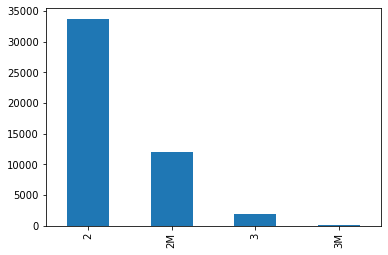

In [72]:
police_calls_priority.Priority.value_counts().plot(kind='bar')

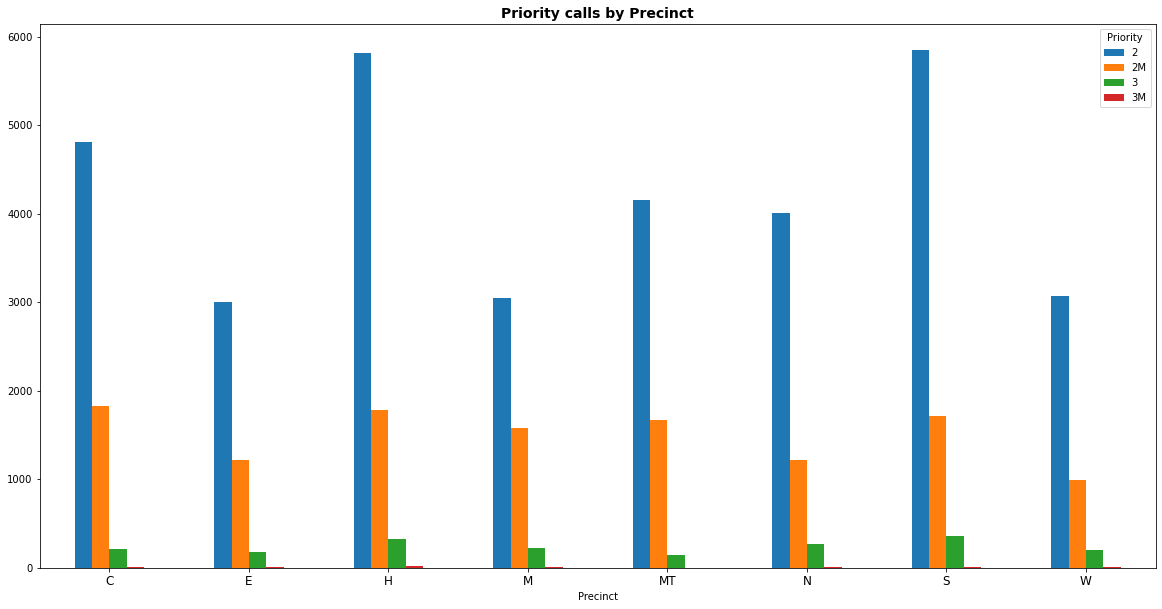

In [73]:
pd.crosstab(police_calls_priority['Precinct'], police_calls_priority['Priority']).plot(kind = 'bar',
                                                                          figsize = (20, 10))
plt.xticks(rotation = 0,                                               
           fontsize = 12)                   
plt.title('Priority calls by Precinct',                             
         fontsize = 14,
         fontweight = 'bold');